In [2]:
import pandas as pd
import missingno as msno
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


# Récuparation des données


In [3]:
df=pd.read_csv("/home/apprenant/Documents/DATA/data_assurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Partie analyse



## Vérifiez les informations manquantes et les doublons (missingno)


### valeurs manquantes

<AxesSubplot:>

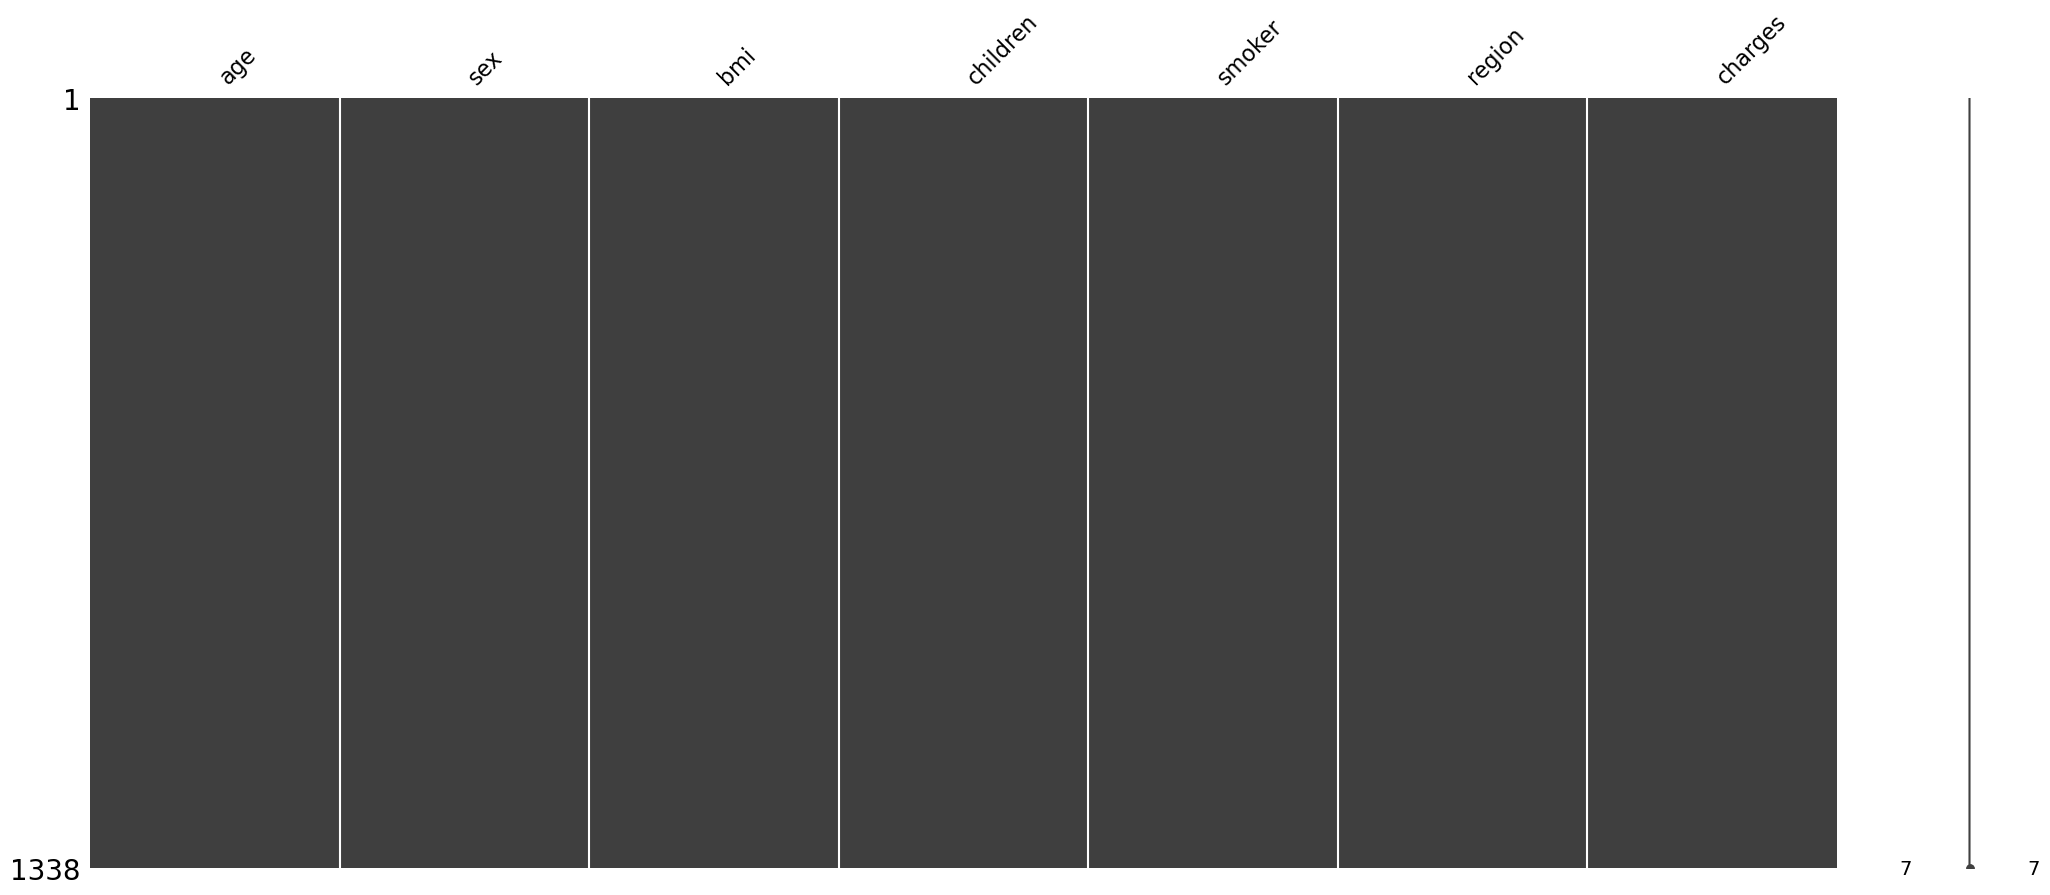

In [4]:
msno.matrix(df)

D'après cette matrix, il n'y a aucune valeur manquante. Vérifions par le calcul

In [5]:
missing_values_count = df.isnull().sum()
missing_values_count

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### L'hypothèse est validé, il n'y aucune information manquantes

### doublons

In [6]:
df.loc[df.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


#### D'après ce calcul, il y a un doublon mais nous ne pouvons pas le supprimer car c'est possible qu'il y a 2 hommes qui ont le même age, le même bmi, n'ont pas d'enfant, sont non fumeur, et vivent dans la même région ce qui donne les mêmes charges

## Est-ce qu’il y a des valeurs aberrantes ?

In [7]:
df.describe(percentiles=[0.1 * i for i in range(1, 10)])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
10%,19.000000,22.990000,0.000000,2346.533615
20%,24.000000,25.326000,0.000000,3991.575720
30%,29.000000,27.360000,0.000000,5484.846770
40%,34.000000,28.797000,0.000000,7369.052730
50%,39.000000,30.400000,1.000000,9382.033000
60%,44.000000,32.032000,1.000000,11399.857160


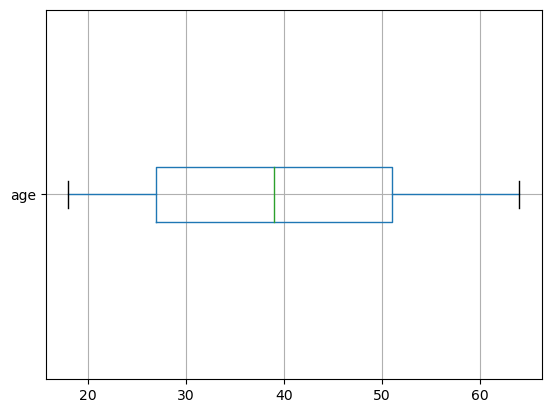

In [8]:
df.boxplot(column="age", vert=False)

plt.show()

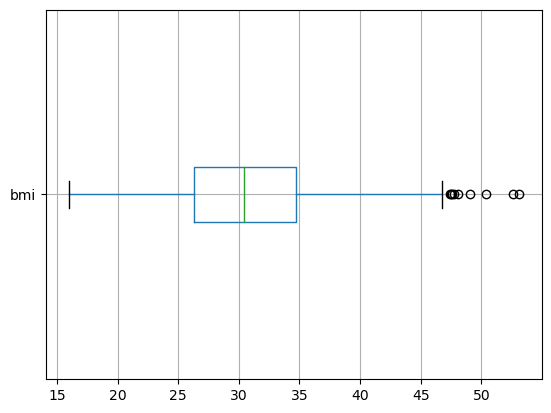

In [9]:

df.boxplot(column="bmi", vert=False)
plt.show()

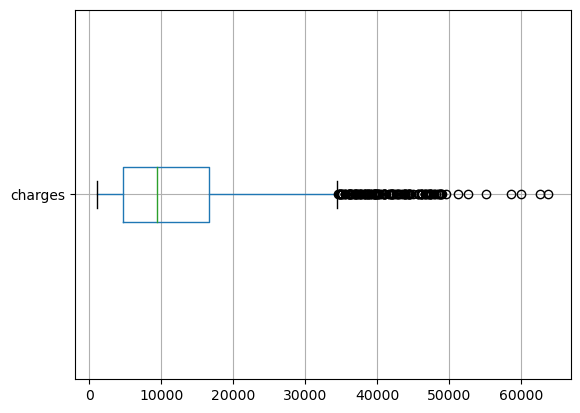

In [10]:

df.boxplot(column="charges", vert=False)
plt.show()

## Analyse univariée de chaque variable. 

### age

<AxesSubplot:xlabel='age', ylabel='Count'>

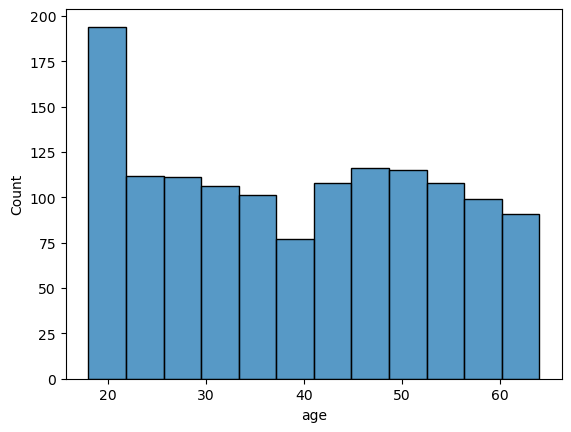

In [11]:
sns.histplot(df.age)

### sexe

<AxesSubplot:title={'center':'Analyse univariée de la variable sexe'}, ylabel='sex'>

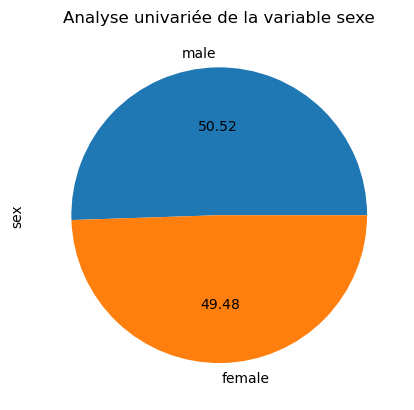

In [12]:
freq_genre = df.sex.value_counts(normalize=True)

plt.title('Analyse univariée de la variable sexe')
freq_genre.plot(kind="pie",autopct='%.2f')

### bmi

<AxesSubplot:xlabel='bmi', ylabel='Count'>

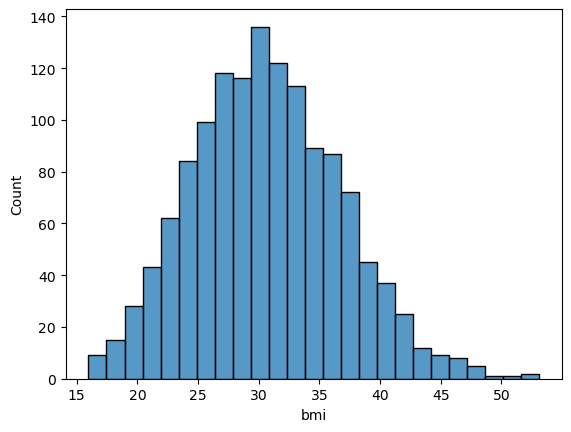

In [13]:
sns.histplot(df.bmi)

In [14]:
shapiro_results = scipy.stats.shapiro(df["bmi"].values)
shapiro_results

ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)

### Children

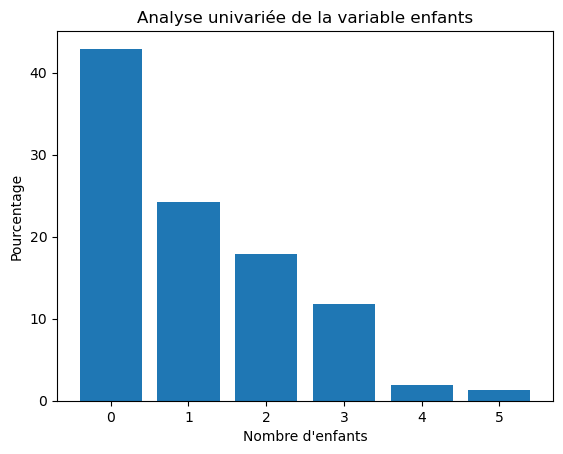

In [15]:
# Calculer la fréquence
frequency = df['children'].value_counts()

# Calculer le pourcentage
percentage = df['children'].value_counts(normalize=True)*100



# Créer le graphique 
plt.bar(frequency.index, percentage)
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Pourcentage')
plt.title('Analyse univariée de la variable enfants')
plt.show()

### Smoker

<AxesSubplot:title={'center':'Analyse univariée de la variable fumeur'}, ylabel='smoker'>

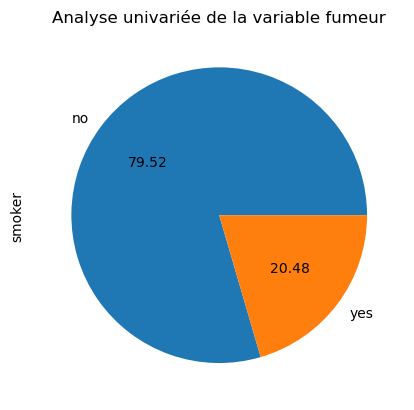

In [16]:
freq_smoker = df.smoker.value_counts(normalize=True)



plt.title('Analyse univariée de la variable fumeur')
freq_smoker.plot(kind="pie",autopct='%.2f')

### Regions

<AxesSubplot:title={'center':'Analyse univariée de la variable region'}, ylabel='region'>

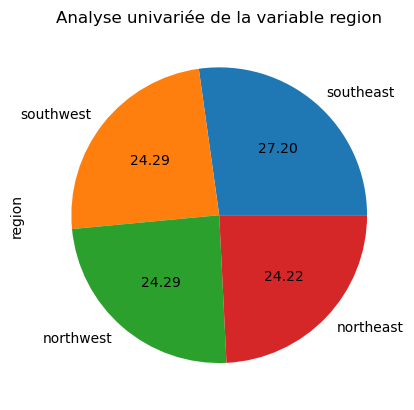

In [17]:
freq_region = df.region.value_counts(normalize=True)



plt.title('Analyse univariée de la variable region')
freq_region.plot(kind="pie",autopct='%.2f')

### charges

<AxesSubplot:xlabel='charges', ylabel='Count'>

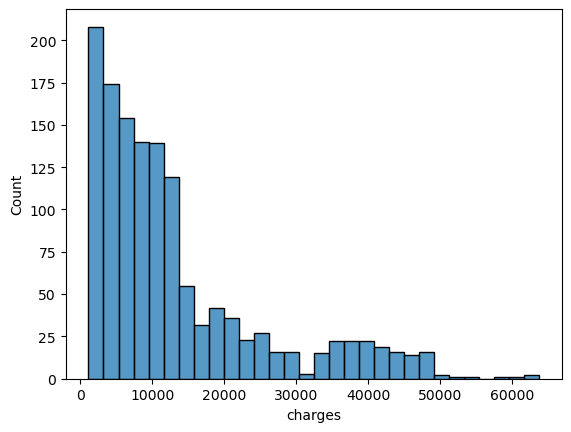

In [18]:
sns.histplot(df.charges)

## Étudier la corrélation des variables avec la variable cible.

### Corrélation entre les variables continues et la variable cible

In [19]:
df_continue = df[["age","bmi","charges"]]

In [20]:
charges_corr = df_continue.corr()['charges'].sort_values() 

print(charges_corr) 

bmi        0.198341
age        0.299008
charges    1.000000
Name: charges, dtype: float64


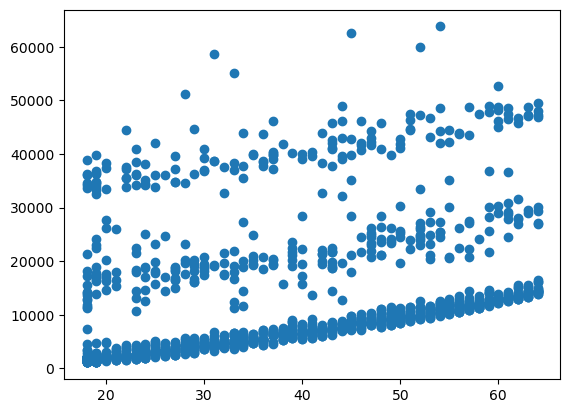

In [21]:
plt.scatter(df.age,df.charges)
plt.show()

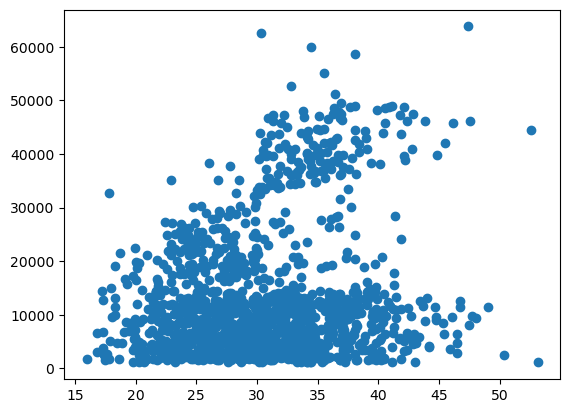

In [22]:
plt.scatter(df.bmi,df.charges)
plt.show()

In [23]:
# Remplacer 'bmi' par le nom de votre colonne de BMI et 'df' par le nom de votre DataFrame
bmi = df['bmi']

# Définissez les bornes de chaque catégorie de BMI
bins = [0, 18.5, 25, 30, 35, 40, float('inf')]

# Utilisez la fonction 'cut' pour transformer les valeurs de BMI en catégories
bmi_categories = pd.cut(bmi, bins, labels=['Underweight', 'Normal weight', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'])

# Ajoutez la colonne de catégories de BMI à votre DataFrame
df['bmi_categories'] = bmi_categories

<AxesSubplot:xlabel='bmi_categories', ylabel='charges'>

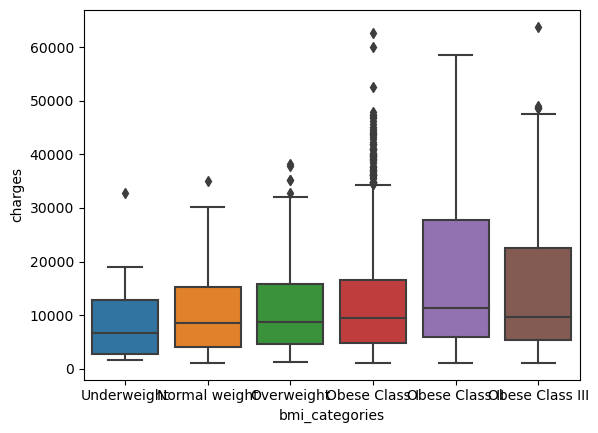

In [28]:
sns.boxplot(x=df.bmi_categories, y= df.charges)

### Corrélation entre les variables discrètes et la variable cible

<AxesSubplot:xlabel='region', ylabel='charges'>

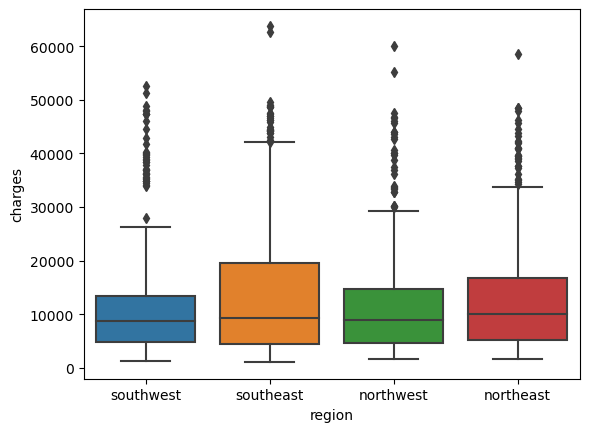

In [24]:
sns.boxplot(x=df.region, y= df.charges)


<AxesSubplot:xlabel='sex', ylabel='charges'>

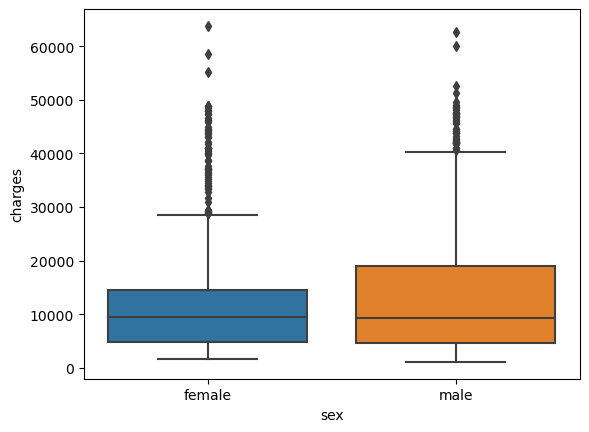

In [25]:
sns.boxplot(x=df.sex, y= df.charges)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

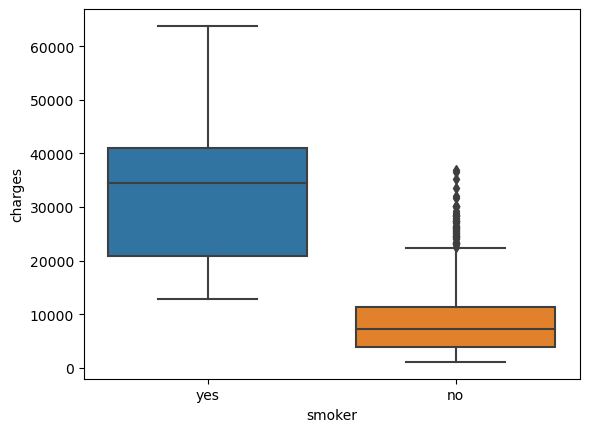

In [26]:
sns.boxplot(x=df.smoker, y= df.charges)

## Effectuer des analyse bivariées (sexe et fumeur par exemple). Tu peux commencer par explorer les données avec des graphique (box plot ou violin plot avec seaborn par exemple) Tu peux valider tes hypothèse grâce à un test statistique.

### Sexe et fumeur

In [27]:
sns.heatmap(df.smoker)

IndexError: Inconsistent shape between the condition and the input (got (1338, 1) and (1338,))